# Quick tests of qdap lib on CoCalc

Kernel: R (R-Project)

https://cran.r-project.org/web/packages/qdap/

In [1]:
require(qdap)

Loading required package: qdap


Loading required package: qdapDictionaries


Loading required package: qdapRegex


Loading required package: qdapTools


Loading required package: RColorBrewer



Attaching package: ‘qdap’



The following object is masked from ‘package:base’:

    Filter



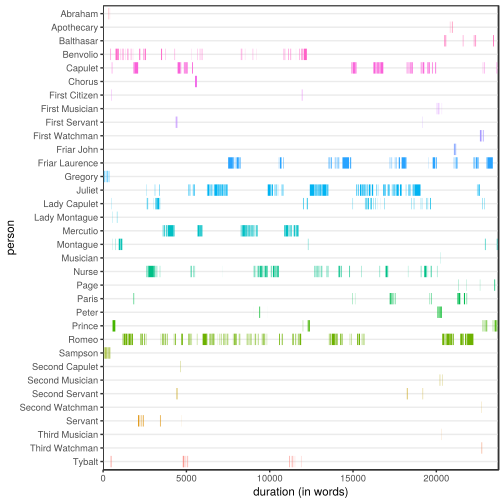

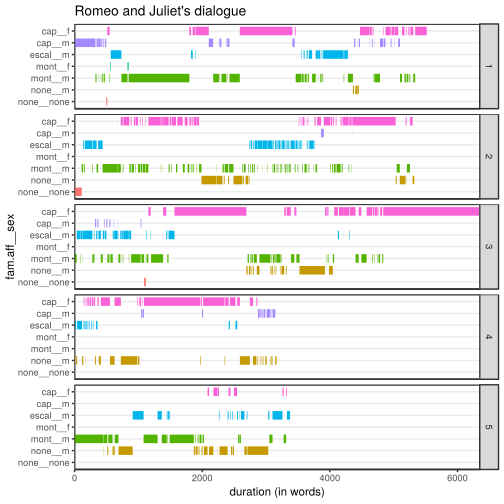

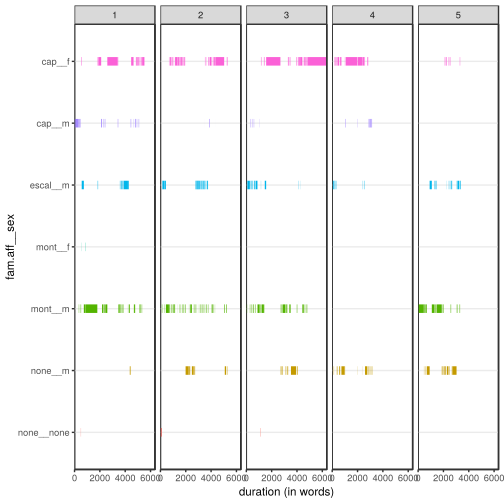


Attaching package: ‘ggplot2’



The following object is masked from ‘package:qdapRegex’:

    %+%



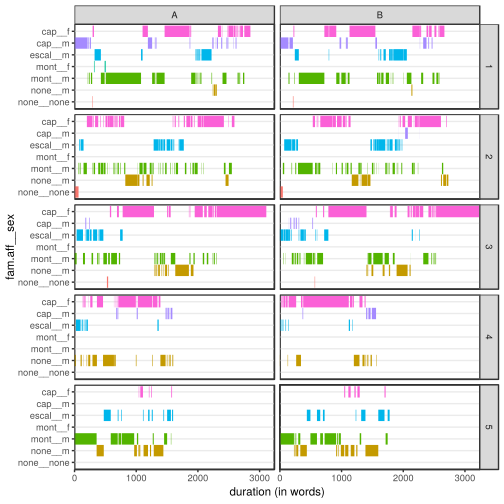

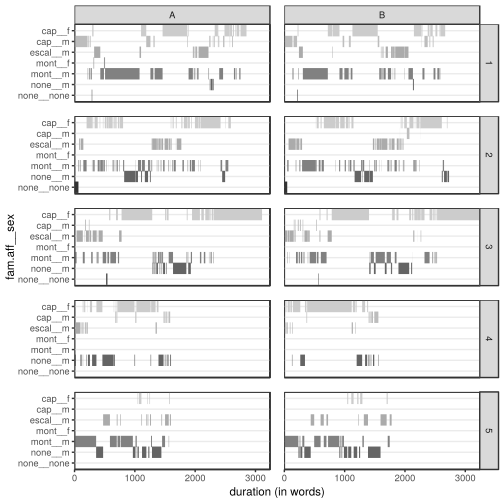

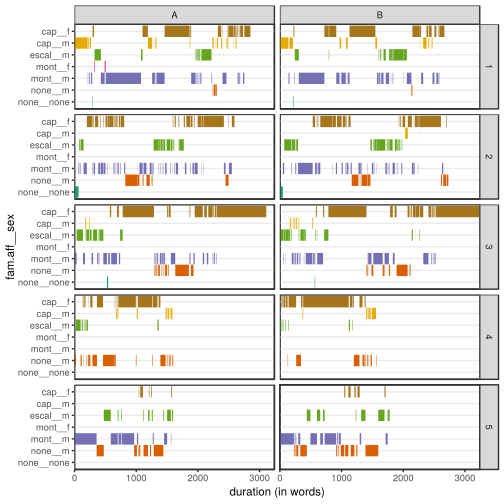

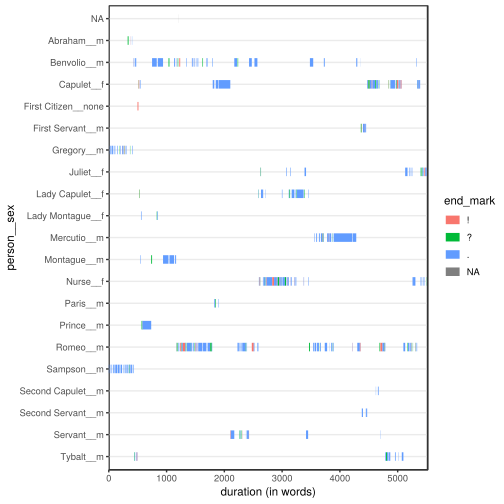

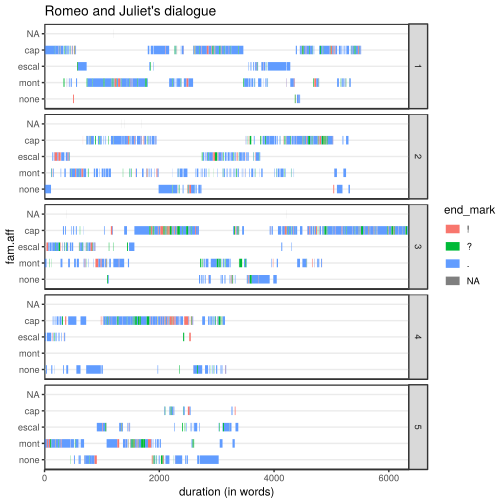

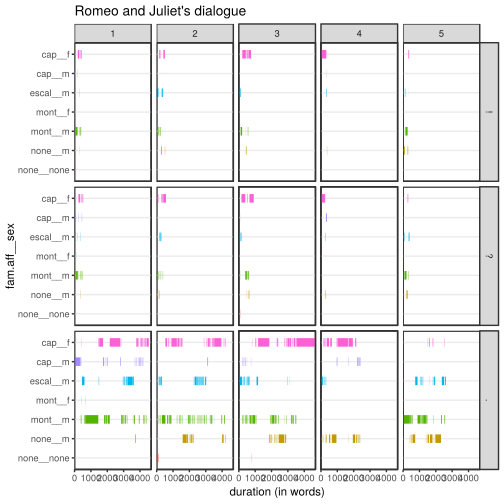

In [2]:
with(rajSPLIT, gantt_plot(text.var = dialogue,
grouping.var = person, size=4))
with(rajSPLIT, gantt_plot(text.var = dialogue,
grouping.var = list(fam.aff, sex), rm.var = act,
title = "Romeo and Juliet's dialogue"))
with(rajSPLIT, gantt_plot(dialogue, list(fam.aff, sex), act,
transform=T))
rajSPLIT2 <- rajSPLIT
rajSPLIT2$newb <- as.factor(sample(LETTERS[1:2], nrow(rajSPLIT2),
replace=TRUE))
z <- with(rajSPLIT2, gantt_plot(dialogue, list(fam.aff, sex),
list(act, newb), size = 4))
library(ggplot2); library(scales); library(RColorBrewer); library(grid)
z + theme(panel.spacing = unit(1, "lines")) + scale_colour_grey()
z + scale_colour_brewer(palette="Dark2")
## Fill Variable Example
dat <- rajSPLIT[rajSPLIT$act == 1, ]
dat$end_mark <- factor(end_mark(dat$dialogue))
with(dat, gantt_plot(text.var = dialogue, grouping.var = list(person, sex),
fill.var=end_mark))
## Repeated Measures with Fill Example
rajSPLIT$end_mark <- end_mark(rajSPLIT$dialogue)
with(rajSPLIT, gantt_plot(text.var = dialogue,
grouping.var = list(fam.aff), rm.var = list(act),
fill.var=end_mark, title = "Romeo and Juliet's dialogue"))
## Repeated Measures Sentence Type Example
with(rajSPLIT, gantt_plot(text.var = dialogue,
grouping.var = list(fam.aff, sex), rm.var = list(end_mark, act),
title = "Romeo and Juliet's dialogue"))
## Reset rajSPLIT
rajSPLIT <- qdap::rajSPLIT

## tot_plot

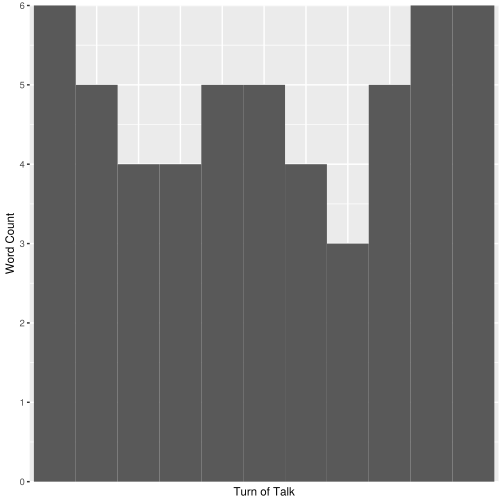

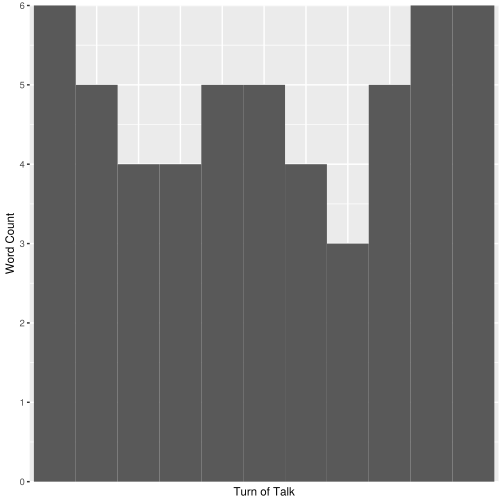

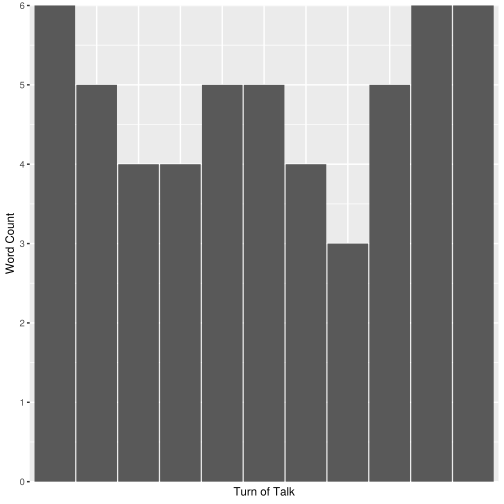

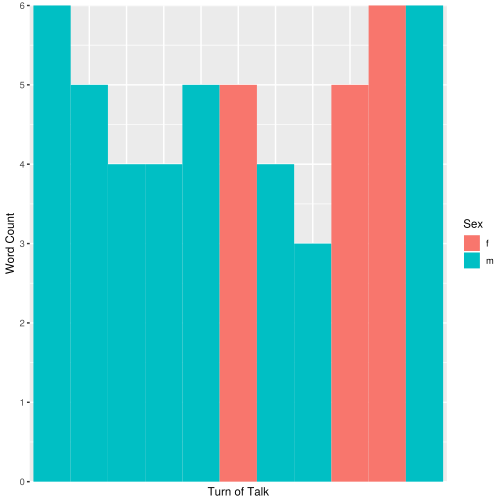

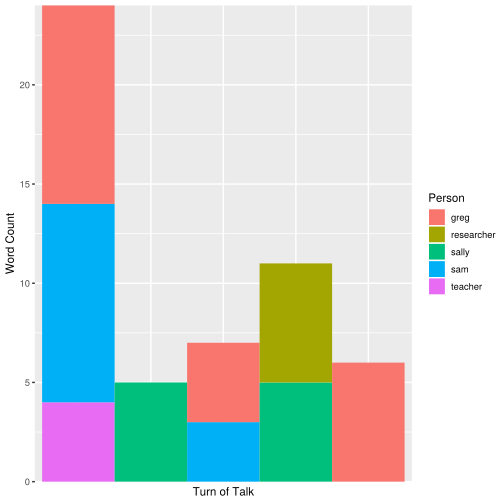

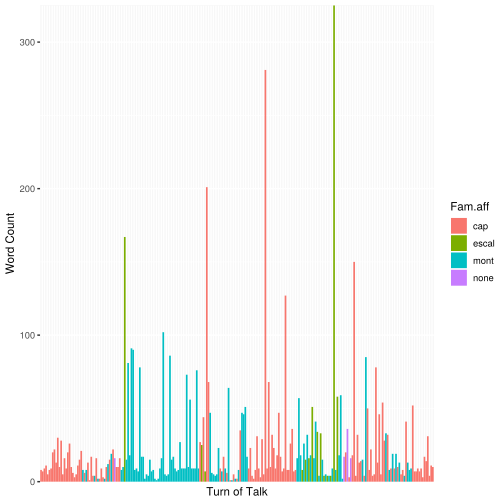

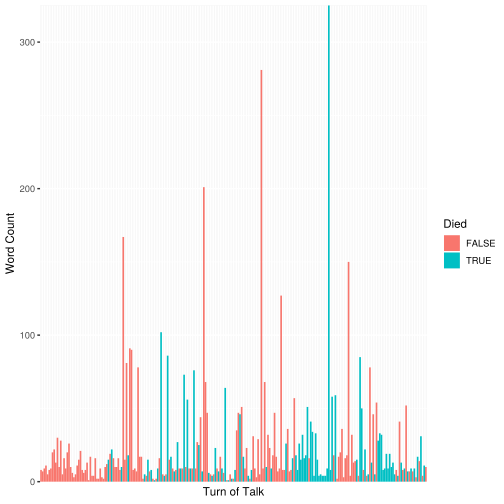

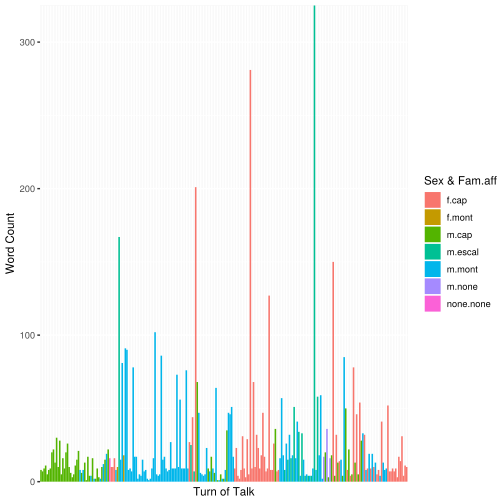

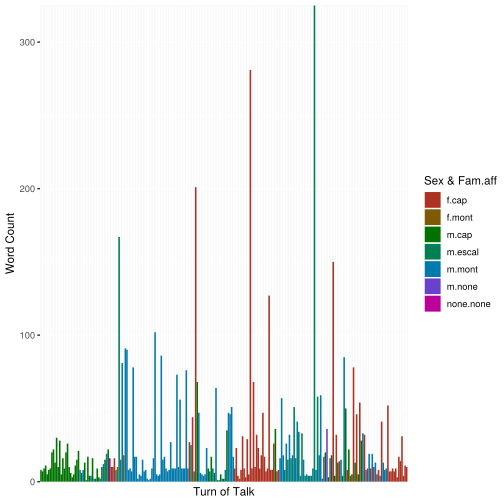

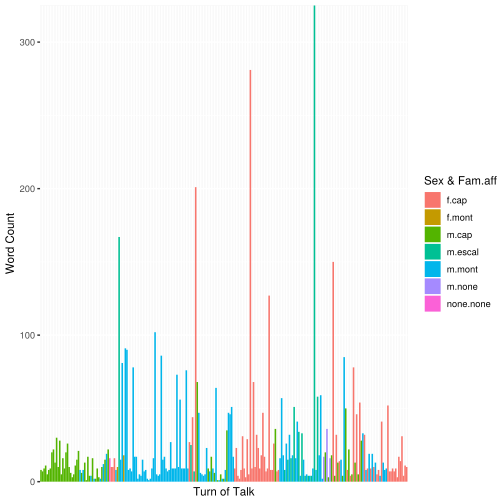

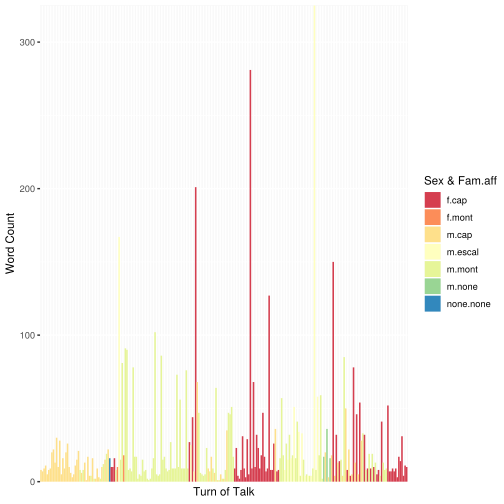

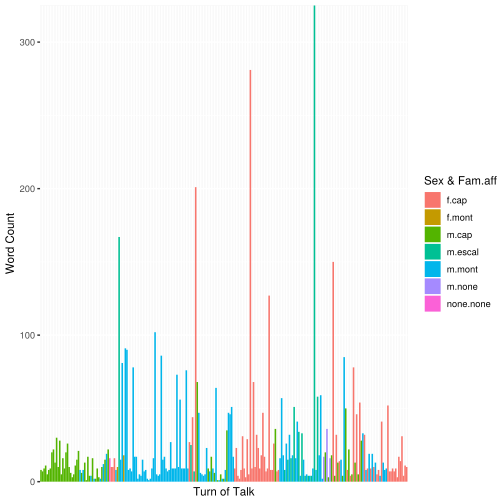

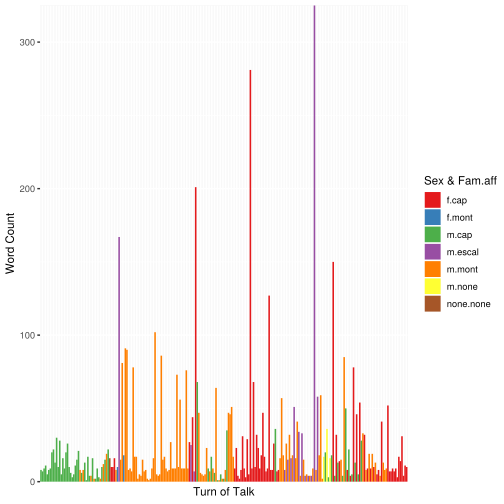

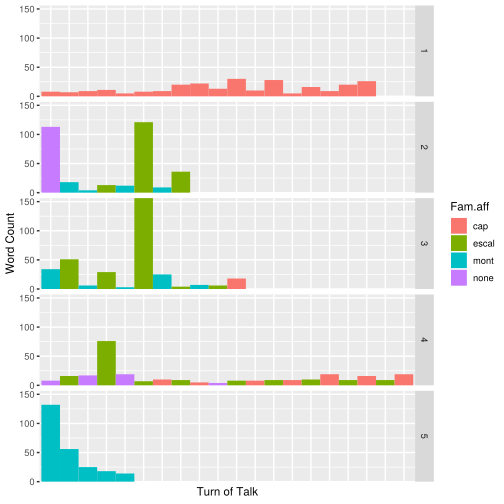

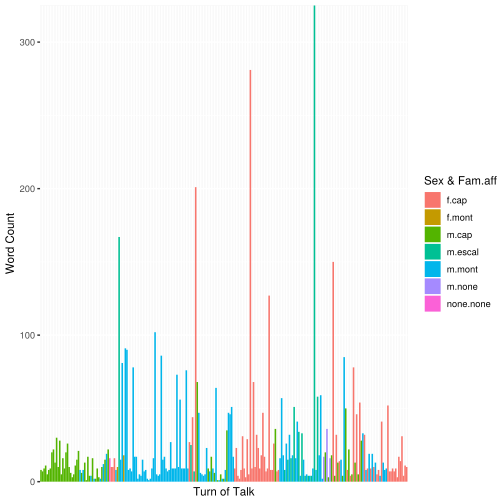

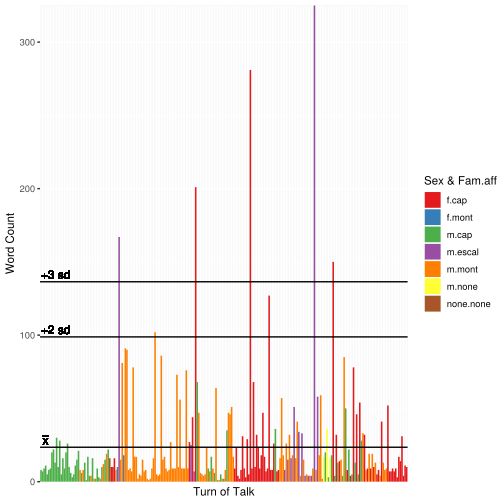

In [3]:
dataframe <- sentSplit(DATA, "state")
tot_plot(dataframe, "state")
tot_plot(DATA, "state", tot=FALSE)
tot_plot(dataframe, "state", bar.space=.03)
tot_plot(dataframe, "state", "sex")
tot_plot(dataframe, "state", "person", tot = "sex")
tot_plot(mraja1, "dialogue", "fam.aff", tot=FALSE)
tot_plot(mraja1, "dialogue", "died", tot=FALSE)
tot_plot(mraja1, "dialogue", c("sex", "fam.aff"), tot=FALSE) +
scale_fill_hue(l=40)
tot_plot(mraja1, "dialogue", c("sex", "fam.aff"), tot=FALSE)+
scale_fill_brewer(palette="Spectral")
tot_plot(mraja1, "dialogue", c("sex", "fam.aff"), tot=FALSE)+
scale_fill_brewer(palette="Set1")
## repeated measures
rajSPLIT2 <- do.call(rbind, lapply(split(rajSPLIT, rajSPLIT$act), head, 25))
tot_plot(rajSPLIT2, "dialogue", "fam.aff", facet.var = "act")
## add mean and +/- 2 sd
tot_plot(mraja1, "dialogue", grouping.var = c("sex", "fam.aff"), tot=FALSE)+
scale_fill_brewer(palette="Set1") +
geom_hline(aes(yintercept=mean(word.count))) +
geom_hline(aes(yintercept=mean(word.count) + (2 *sd(word.count)))) +
geom_hline(aes(yintercept=mean(word.count) + (3 *sd(word.count)))) +
geom_text(parse=TRUE, hjust=0, vjust=0, family="serif", size = 4, aes(x = 2,
y = mean(word.count) + 2, label = "bar(x)")) +
geom_text(hjust=0, vjust=0, family="serif", size = 4, aes(x = 1,
y = mean(word.count) + (2 *sd(word.count)) + 2, label = "+2 sd")) +
geom_text(hjust=0, vjust=0, family="serif", size = 4, aes(x = 1,
y = mean(word.count) + (3 *sd(word.count)) + 2, label = "+3 sd"))

## word cloud

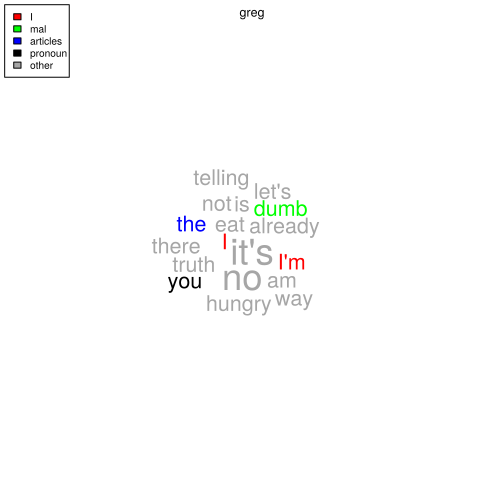

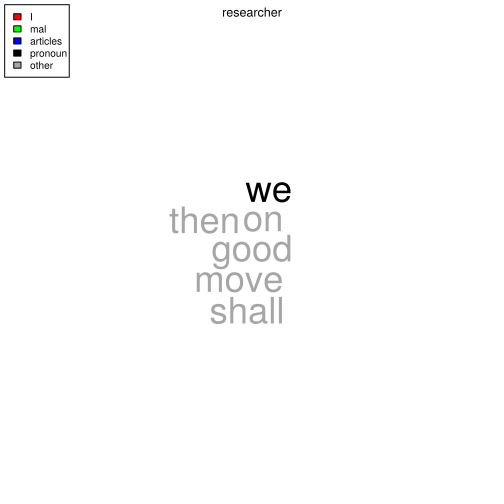

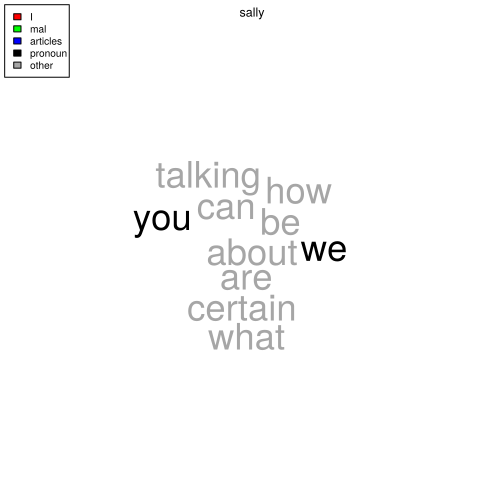

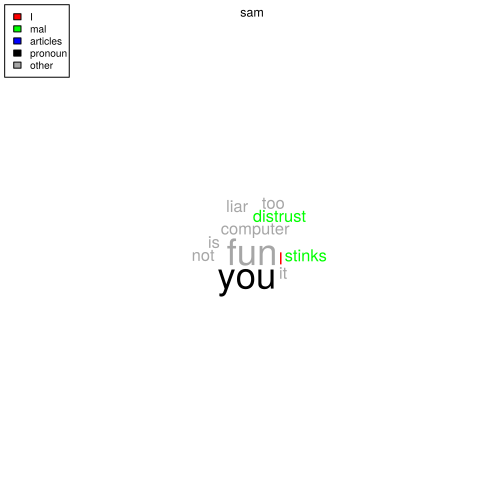

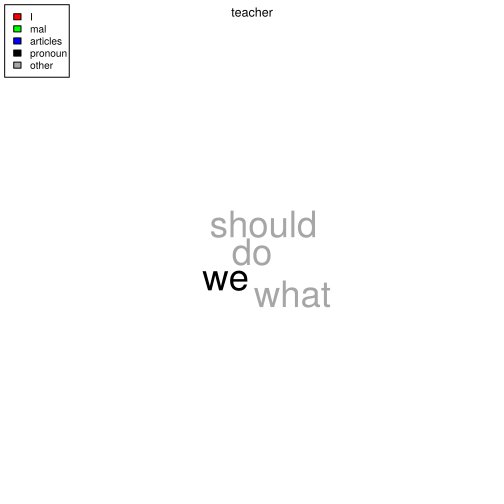

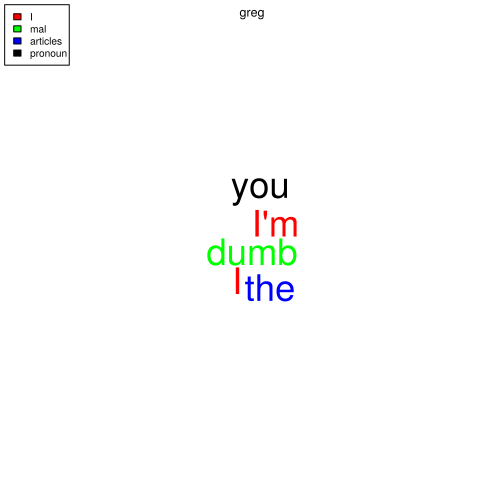

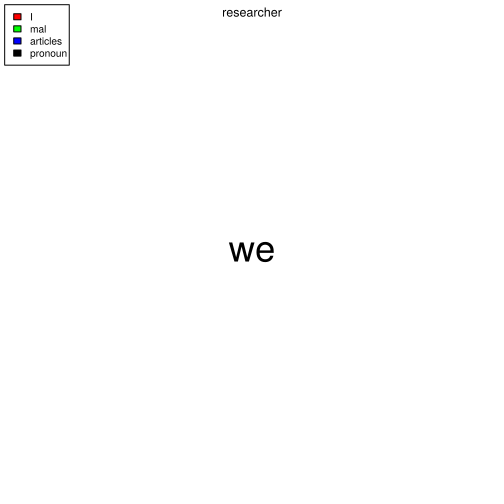

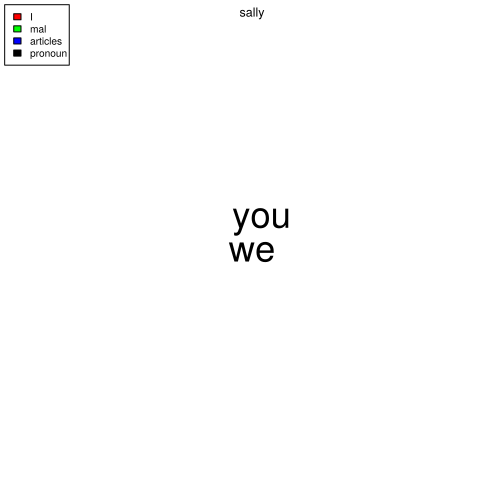

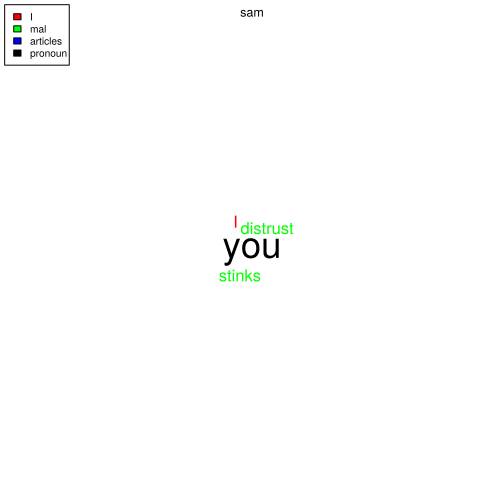

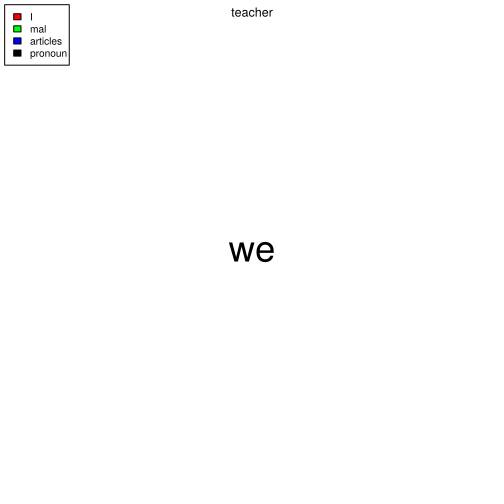

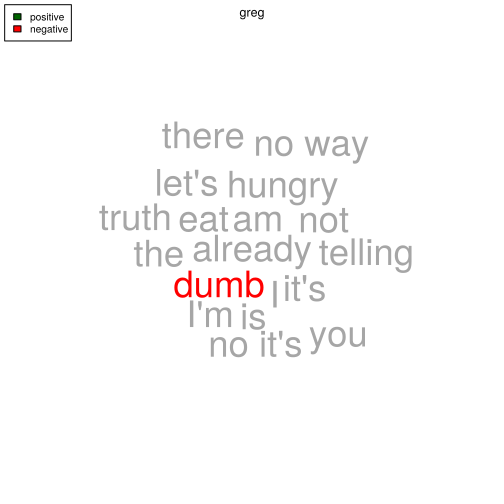

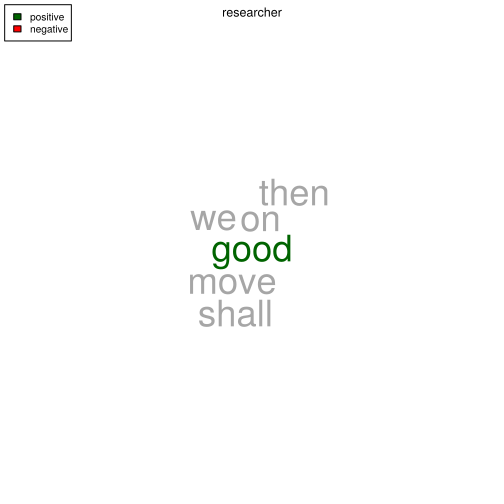

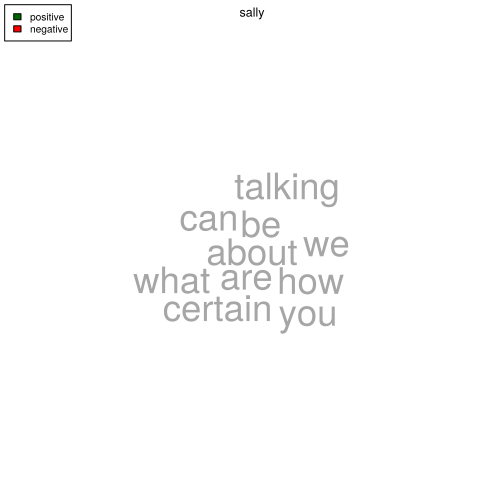

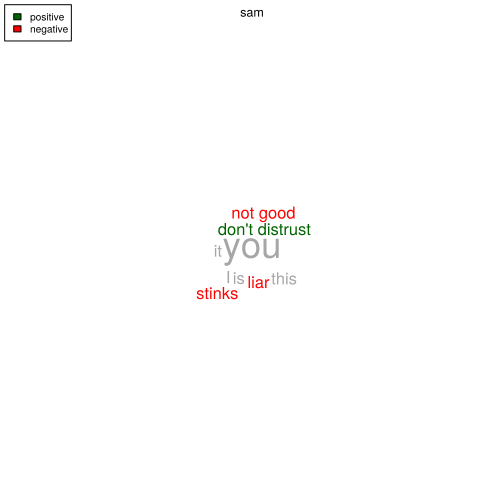

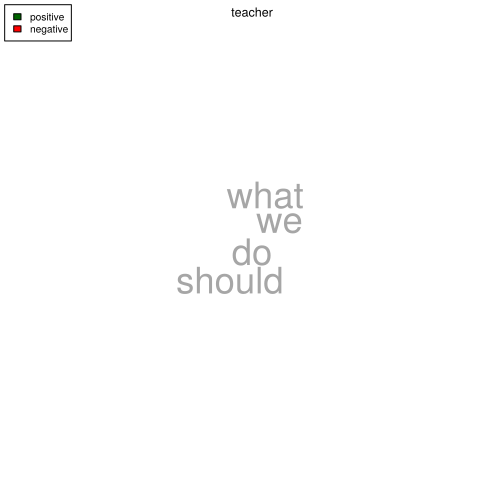

In [4]:
terms <- list(
I=c("i", "i'm"),
mal=qcv(stinks, dumb, distrust),
articles=qcv(the, a, an),
pronoun=qcv(we, you)
)
with(DATA, trans_cloud(state, person, target.words=terms,
cloud.colors=qcv(red, green, blue, black, gray65),
expand.target=FALSE, proportional=TRUE, legend=c(names(terms),
"other")))
with(DATA, trans_cloud(state, person, target.words=terms,
stopwords=exclude(with(DATA, unique(bag_o_words(state))),
unique(unlist(terms))),
cloud.colors=qcv(red, green, blue, black, gray65),
expand.target=FALSE, proportional=TRUE, legend=names(terms)))
#color the negated phrases opposite:
DATA <- qdap::DATA
DATA[1, 4] <- "This is not good!"
DATA[8, 4] <- "I don't distrust you."
DATA$state <- space_fill(DATA$state, paste0(negation.words, " "),
rm.extra = FALSE)
txt <- gsub("~~", " ", breaker(DATA$state))
rev.neg <- sapply(negation.words, paste, negative.words)
rev.pos <- sapply(negation.words, paste, positive.words)
tw <- list(
positive=c(positive.words, rev.neg[rev.neg %in% txt]),
negative=c(negative.words, rev.pos[rev.pos %in% txt])
)
with(DATA, trans_cloud(state, person,
target.words=tw,
cloud.colors=qcv(darkgreen, red, gray65),
expand.target=FALSE, proportional=TRUE, legend=names(tw)))
DATA <- qdap::DATA ## Reset DATA